In [83]:
import torch
import pandas as pd 
import numpy as np
import pickle as pc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [84]:
import torch
import nltk
import re
import json
import time
import numpy as np
import pandas as pd
import pickle as pc

from scipy.spatial.distance import cosine


In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
import os
os.chdir('/content/drive/Shared drives/hse_BERT/hse_Af_Tr_BERT')

In [87]:
# folder = "bert-base-multilingual-cased-liter"
# folder = "bert-base-multilingual-cased-liter2"
# folder = "bert-base-multilingual-cased-liter3"
# folder = "bert-base-multilingual-cased-polit"
# folder = "bert-base-multilingual-cased-polit2"
# folder = "bert-base-multilingual-cased-polit3"
# folder = "DeepPavlov-liter"
# folder = "DeepPavlov-liter_2"
# folder = "DeepPavlov-liter_3"
# folder = "DeepPavlov-polit"
# folder = "DeepPavlov-polit_2"
# folder = "DeepPavlov-polit_3"

In [88]:
folders = [
    "bert-base-multilingual-cased-liter",
    "bert-base-multilingual-cased-liter2",
    "bert-base-multilingual-cased-liter3",
    "bert-base-multilingual-cased-polit",
    "bert-base-multilingual-cased-polit2",
    "bert-base-multilingual-cased-polit3",
    "DeepPavlov-liter",
    "DeepPavlov-liter_2",
    "DeepPavlov-liter_3",
    "DeepPavlov-polit",
    "DeepPavlov-polit_2",
    "DeepPavlov-polit_3",
    "elmo-DeepPavlov-liter",
    "elmo-DeepPavlov-polit"
]

In [ ]:
# cccut = re.compile(r'_')
# for i, key1 in enumerate(folders):

    
#     key = cccut.sub("\_",key1)
#     key2 = cccut.sub("",key1)
#     print("")
#     print("\\begin{figure}[H]")
#     print("\centering")
#     print("\includegraphics[width=0.9\linewidth]{{image/res_{} }}".format(key1))
#     print("\caption*{{Рис. B{}. Результаты тестирования для модели {} }}".format(i+1, key))
#     print("\label{{fig:res{} }}".format(key2))
#     print("\end{figure}")

In [89]:

def to_tensors(d3):
    print("convert")
    for key in d3:
        d3[key] = torch.tensor(d3[key])
    return d3

def get_dct(folder):
    with open("./embeddings/{}/dict_{}.pic".format(folder, folder), "br") as f:
        dct1  = pc.load(f)

    if not isinstance(dct1[list(dct1.keys())[0]], torch.Tensor):
        dct1 = to_tensors(dct1)

    return dct1



def get_pca(dct):
    vdct = list(dct.items())
    keys = list(map(lambda x: x[0], vdct))
    tens = torch.stack(list(map(lambda x: x[1], vdct)))
    x = StandardScaler().fit_transform(tens)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
    principalDf.index = keys
    return principalDf

In [90]:
# d3 = get_dct("elmo-DeepPavlov-polit")

In [91]:
# type(d3[list(d3.keys())[0]])

# check models

check existance dictionaries

In [92]:
print(list(map(lambda x: os.path.exists("./embeddings/{}/dict_{}.pic".format(x, x)), folders)))
for folder in folders:
    if not os.path.exists("./embeddings/{}/dict_{}.pic".format(folder, folder)):
        print("dct in {} is not exists".format(folder))

[True, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [93]:
files = [
         "3cosadd_3_itog.csv",
         "3cosadd_itog.csv", 
         "3cosavg_res_2.csv",
         "3cosmul_itog.csv"

]
for file in files:
    print(file, list(map(lambda x: os.path.exists("./embeddings/{}/tests/{}".format(x, file)), folders)))
    for folder in folders:
        if not os.path.exists("./embeddings/{}/tests/{}".format(folder, file)):
            print("{} in {} is not exists".format(file, folder))

3cosadd_3_itog.csv [True, True, True, True, True, True, True, True, True, True, True, True, True, True]
3cosadd_itog.csv [True, True, True, True, True, True, True, True, True, True, True, True, True, True]
3cosavg_res_2.csv [True, True, True, True, True, True, True, True, True, True, True, True, True, True]
3cosmul_itog.csv [True, True, True, True, True, True, True, True, True, True, True, True, True, True]


In [94]:
groups = [": capital-world",
": family",
": gram1-adjective-to-adverb",
": gram2-opposite",
": gram3-comparative",
": gram6-nationality-adjective"
]

res_df1_mul = pd.DataFrame()
for key in groups:
    res_df1_mul = pd.concat([res_df1_mul, pd.read_csv("./embeddings/{}/tests/3cosmul_res_{}.csv".format(folder, key))], ignore_index = True )

In [12]:
res_df1_mul["result"] = res_df1_mul["expected"]  == res_df1_mul["prdicted"] 
count_1 = res_df1_mul.groupby("group").count()
res_df_1_mul = res_df1_mul.groupby("group").mean().sort_values(by = "result")
res_df_1_mul["count"] = count_1["w1"]
res_df_1_mul = add_names(res_df_1_mul)
res_df_1_mul.index = res_df_1_mul["type"]
save_table(res_df1_mul, "3cosmul_res")
save_table(res_df_1_mul, "3cosmul_itog")
res_df_1_mul[["cosine", "result", "count"]]

NameError: ignored

In [98]:
def save_table(df, name):
    df.to_csv("./embeddings/{}/tests/{}.csv".format(folder, name))
def get_word(emb, dct, nin = []):
    word = "none"
    cs = -100 
    for key in dct:
        temp_cs = 1 - cosine(emb, dct[key])
        if temp_cs > cs and key not in nin:
            cs = temp_cs
            word = key
    return word, cs

def get_word_m(emb, dct, count = 3):
    res = {}
    for key in dct:
        res[key] = 1 - cosine(emb, dct[key])
    l = list(res.items()) 
    l.sort(key= lambda x:x[1], reverse = True)
    return dict(l[:count])
def add_names(df):
    names = {': capital-common-countries' : "Capitals-common-countries",
 ': capital-world': "Capital-countries",
 ': currency': "Currency",
#  ': city-in-state',
 ': family': "Family",
 ': gram1-adjective-to-adverb': "Adjective adverb",
 ': gram2-opposite': "Opposite",
 ': gram3-comparative': "Comparative",
#  ': gram4-superlative',
#  ': gram5-present-participle',
 ': gram6-nationality-adjective': "Nationality adjective",
#  ': gram7-past-tense',
#  ': gram8-plural',
#  ': gram9-plural-verbs'
    }
    df["type"] = "none"
    for i in names:
        if i in df.index:
            df.loc[i, "type"] = names[i]

    return df
names2 = {': capital-common-countries' : "Capitals-common-countries",
 ': capital-world': "Capital-countries",
 ': currency': "Currency",
#  ': city-in-state',
 ': family': "Family",
 ': gram1-adjective-to-adverb': "Adjective adverb",
 ': gram2-opposite': "Opposite",
 ': gram3-comparative': "Comparative",
#  ': gram4-superlative',
#  ': gram5-present-participle',
 ': gram6-nationality-adjective': "Nationality adjective",
#  ': gram7-past-tense',
#  ': gram8-plural',
#  ': gram9-plural-verbs'
    }
names = {': capital-common-countries' : "Известные столицы - страны",
 ': capital-world': "Столицы - страны",
 ': currency': "Валюта",
#  ': city-in-state',
 ': family': "Семья",
 ': gram1-adjective-to-adverb': "Прилагательное - наречие",
 ': gram2-opposite': "Антонимы",
 ': gram3-comparative': "Сравнение",
#  ': gram4-superlative',
#  ': gram5-present-participle',
 ': gram6-nationality-adjective': "Национальность - прилагательное",
#  ': gram7-past-tense',
#  ': gram8-plural',
#  ': gram9-plural-verbs'
    }
def add_names_rus(df):
    df["type1"] = "none"
    for i in names:
        if names2[i] in df.index:
            # print(names2[i], i, names[i])
            df.loc[names2[i], "type1"] = names[i]
            
    df.index = df["type1"]

    return df

In [ ]:
# add_names_rus(r)

Capital-countries : capital-world Столицы - страны
Family : family Семья
Adjective adverb : gram1-adjective-to-adverb Прилагательное - наречие
Opposite : gram2-opposite Антонимы
Comparative : gram3-comparative Сравнение
Nationality adjective : gram6-nationality-adjective Национальность - прилагательное


accuracy  ...                            type1
metric                            3CosAdd  ...                                 
type1                                      ...                                 
Прилагательное - наречие         0.281579  ...         Прилагательное - наречие
Столицы - страны                 0.000000  ...                 Столицы - страны
Сравнение                        0.388889  ...                        Сравнение
Семья                            0.250000  ...                            Семья
Национальность - прилагательное  0.287179  ...  Национальность - прилагательное
Антонимы                         0.000000  ...                         Антонимы

[6 rows x 14 columns]

In [13]:
# add_names_rus(results[folders[0]])

#normalize demo

In [ ]:
vdct = list(dct.items())
keys = list(map(lambda x: x[0], vdct))
tens = torch.stack(list(map(lambda x: x[1], vdct)))

NameError: ignored

In [ ]:
x = StandardScaler().fit_transform(tens)

In [ ]:
# pd.DataFrame(data = x).head()

In [ ]:
pca = PCA(n_components=2)

In [ ]:
principalComponents = pca.fit_transform(x)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf2 = principalDf.copy()
principalDf2.index = keys

#viz

In [22]:
def draw_subplots(pcas, folders_matr ,  words_dct, width = 0.005, colors = ['r', 'g'], n=5):

    x = len(folders_matr[0])
    y = len(folders_matr)

    fig = plt.figure(figsize = (6 * x,6 * y))
    for i in range(y):
        for j in range(x):
            name = folders_matr[i][j]
            principalDf = pcas[name]
            ax = fig.add_subplot(y,x,x * i + j + 1) 
            ax.set_xlabel('Principal Component 1', fontsize = 8)
            ax.set_ylabel('Principal Component 2', fontsize = 8)

            ax.set_title(name, fontsize = 10)
            # ii = 0
            for w in words_dct[name]:
                # w = words_dct[name][ii]
                # ii += 1
                
                if w[0] not in principalDf.index or w[1] not in principalDf.index:
                    continue
                
                # n-=1
                for j in range(2):
                    ax.scatter(principalDf.loc[w[j], 'principal component 1']
                            , principalDf.loc[w[j], 'principal component 2']
                            , c = colors[j]
                            , s = 50)
                    
                    ax.text(principalDf.loc[w[j], 'principal component 1'] + 0.1
                            , principalDf.loc[w[j], 'principal component 2']
                            , w[j]
                            , c = colors[j]
                            # rotation = 38,
                            , fontsize = 12
                            )
                ax.arrow(principalDf.loc[w[0], 'principal component 1'],
                        principalDf.loc[w[0], 'principal component 2'],
                        principalDf.loc[w[1], 'principal component 1'] - principalDf.loc[w[0], 'principal component 1'],
                        principalDf.loc[w[1], 'principal component 2'] - principalDf.loc[w[0], 'principal component 2'],
                        #  width = 0.03,
                        head_width = 0.1,
                        head_length = 0.2,
                        length_includes_head = True,
                        overhang = 0.5
                        )
            # ax.legend(targets)
            ax.grid()

In [ ]:
dct = get_dct(folder)
principalDf = get_pca(dct)

In [ ]:
fig = plt.figure(figsize = (15,28))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

width = 0.005

colors = ['r', 'g']

for w in words:

    i+=1

for w in words2:
    for j in range(2):
        ax.scatter(principalDf.loc[w[j], 'principal component 1']
                , principalDf.loc[w[j], 'principal component 2']
                , c = colors[j]
                , s = 50)
        
        ax.text(principalDf.loc[w[j], 'principal component 1'] + 0.1
                , principalDf.loc[w[j], 'principal component 2']
                , w[j]
                , c = colors[j]
                # rotation = 38,
                , fontsize = 12
                )
    ax.arrow(principalDf.loc[w[0], 'principal component 1'],
             principalDf.loc[w[0], 'principal component 2'],
             principalDf.loc[w[1], 'principal component 1'] - principalDf.loc[w[0], 'principal component 1'],
             principalDf.loc[w[1], 'principal component 2'] - principalDf.loc[w[0], 'principal component 2'],
            #  width = 0.03,
             head_width = 0.1,
             head_length = 0.2,
             length_includes_head = True,
             overhang = 0.5
             )
# ax.legend(targets)
ax.grid()

# work with pairs

In [ ]:
data = {}
for i in folders:
    data[i] = get_pca(get_dct(i))

FileNotFoundError: ignored

In [ ]:
# dct = get_dct(folder)
# principalDf = get_pca(dct)

In [ ]:
with open("tests/gats/ready.pic", "br") as f:
    words_rus = pc.load( f)
pairs = {}
for key in words_rus:
    s = []
    for i in words_rus[key]:
        s.append((i[0], i[1]))
        s.append((i[2], i[3]))
    pairs[key] = list(set(s))

In [ ]:
pairs.keys()

dict_keys([': capital-world', ': family', ': gram1-adjective-to-adverb', ': gram2-opposite', ': gram3-comparative', ': gram6-nationality-adjective'])

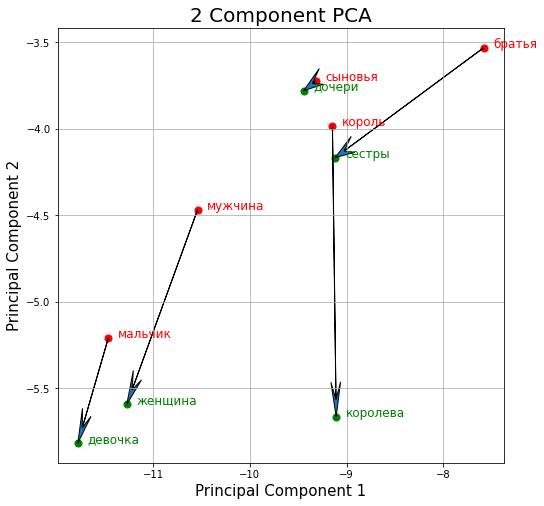

In [ ]:
draw(principalDf, pairs[": family"])

# PART 1

In [124]:
# draw_subplots(pcas, folders_matr ,  words_dct)

pcas = {}
dcts = {}
for key in folders:
    dcts[key] = get_dct(key)
    pcas[key] = get_pca(dcts[key])
    print(key)

bert-base-multilingual-cased-liter
bert-base-multilingual-cased-liter2
bert-base-multilingual-cased-liter3
bert-base-multilingual-cased-polit
bert-base-multilingual-cased-polit2
bert-base-multilingual-cased-polit3
DeepPavlov-liter
DeepPavlov-liter_2
DeepPavlov-liter_3
DeepPavlov-polit
DeepPavlov-polit_2
DeepPavlov-polit_3
convert
elmo-DeepPavlov-liter
convert
elmo-DeepPavlov-polit


In [35]:
matr = []
for i in range(4):
    matr.append(folders[i*3: (i+1)*3])
    print(folders[i*3: (i+1)*3])

['bert-base-multilingual-cased-liter', 'bert-base-multilingual-cased-liter2', 'bert-base-multilingual-cased-liter3']
['bert-base-multilingual-cased-polit', 'bert-base-multilingual-cased-polit2', 'bert-base-multilingual-cased-polit3']
['DeepPavlov-liter', 'DeepPavlov-liter_2', 'DeepPavlov-liter_3']
['DeepPavlov-polit', 'DeepPavlov-polit_2', 'DeepPavlov-polit_3']


In [ ]:
matr = [[ 'bert-base-multilingual-cased-liter2', 'bert-base-multilingual-cased-liter3'],
['bert-base-multilingual-cased-polit', 'bert-base-multilingual-cased-polit2', 'bert-base-multilingual-cased-polit3'],
['DeepPavlov-liter', 'DeepPavlov-liter_2', 'DeepPavlov-liter_3'],
['DeepPavlov-polit', 'DeepPavlov-polit_2', 'DeepPavlov-polit_3']]

In [ ]:
with open("tests/gats/ready.pic", "br") as f:
    words_rus = pc.load( f)
pairs = {}
for key in words_rus:
    s = []
    for i in words_rus[key]:
        s.append((i[0], i[1]))
        s.append((i[2], i[3]))
    pairs[key] = list(set(s))
words_rus.keys()

dict_keys([': capital-world', ': family', ': gram1-adjective-to-adverb', ': gram2-opposite', ': gram3-comparative', ': gram6-nationality-adjective'])

In [ ]:
words_dct = {}
for i in folders:
    words_dct[i] = pairs[": family"]

In [ ]:
dicts = {}
inters = {}

for i in folders:
    dicts[i] = set(dcts[i].keys())


for key in pairs:
    inters[key] = []
    for i in pairs[key]:
        flag = True
        for j in minf:
            if i[0] not in dicts[j] or i[1] not in dicts[j]:
                flag = False
        if flag:
            inters[key].append(i)

In [ ]:
matr2 = [[ "elmo-DeepPavlov-liter", "elmo-DeepPavlov-polit"]]
minf = [ "elmo-DeepPavlov-liter", "elmo-DeepPavlov-polit"]

In [ ]:
inters

{': capital-world': [],
 ': family': [],
 ': gram1-adjective-to-adverb': [],
 ': gram2-opposite': [('возможно', 'невозможно'), ('скорее', 'вряд')],
 ': gram3-comparative': [('легко', 'легче'),
  ('хорошо', 'лучше'),
  ('большой', 'больше'),
  ('высокий', 'выше')],
 ': gram6-nationality-adjective': [('россия', 'русский')]}

In [ ]:
words_dct = {}
for i in folders:
    words_dct[i] = inters[": gram3-comparative"]

In [ ]:
pairs[": family"]

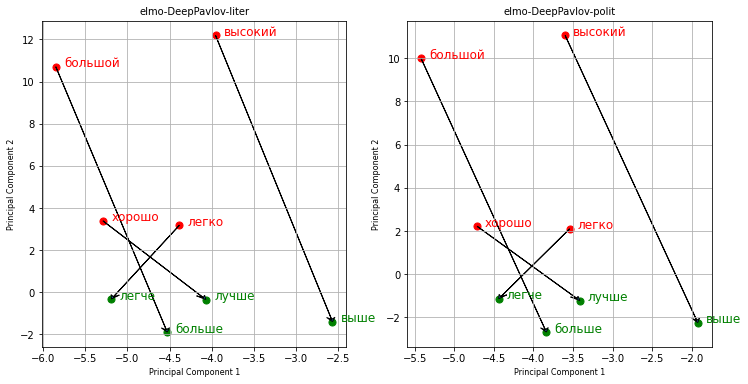

In [ ]:
draw_subplots(pcas, matr2,words_dct)

#PART 2

## aggregate

In [125]:
folder = "DeepPavlov-liter_3"

In [15]:
def my_dump(file, name):
    with open("./" + name + ".pic", 'wb') as f:
        pc.dump(file, f)

def my_load(name):
    with open("./" + name + ".pic", 'rb') as f:
        return pc.load(f)

In [16]:
from_files = my_load("embeddings/{}/from_files".format(folder))
all_count = my_load("embeddings/{}/all_count".format(folder))

In [17]:
out = list(zip(all_count.keys(), list(all_count.values())))
out.sort(key = lambda i: i[1], reverse=True)
# out[:20]

In [18]:
keys = list(all_count.keys())
k1 = []
k2 = []
k3 = []
kb = []
l = 0
for i in keys:
    l = len(i)
    if l == 1:
        k1.append(i)
    elif l == 2:
        k2.append(i)
    elif l == 3:
        k3.append(i)
    else:
        kb.append(i)
len(k1),len(k2),len(k3),len(kb)

(98, 1716, 8925, 573079)

In [19]:
all_words = []
for i in kb:
    if all_count[i] > 10:
        all_words.append(i)
len(all_words)

76806

In [20]:
def check_existing_emb(words):
    d = dict(out)
    fl = True
    for i in words:
        if i not in d:
            print("{} not in dictionary".format(i))
            fl = False
    return fl

def get_all_embeddings(words):
    all_files = []
    embeddings = {}
    for w in words:
        embeddings[w] = []

    for i in words:
        all_files += from_files[i]

    for name in set(all_files):
        with open("./embeddings/{}/bin/{}".format(folder, name), 'rb') as f:
            data = pc.load(f)
        for w in words:
            if w in data:
                embeddings[w] += data[w]
    return embeddings

def sum_embeddings(embeddings):
    res = {}
    res_emb = {}
    for i in embeddings:
        res[i] = torch.empty(len(embeddings[i]), embeddings[i][0].size(0))
        for j in range(len(embeddings[i])):
            res[i][j] = embeddings[i][j]
        res_emb[i] = res[i].mean(dim = 0)
    return res_emb

In [32]:
# with open("./embeddings/{}/dict_{}.pic".format(folder, folder), "br") as f:
#     dcts  = pc.load(f)

In [31]:
# type(emb["папа"][0])

In [21]:
def get_all_emb(word):
    emb = get_all_embeddings([word])
    tens = torch.stack(emb[word])
    mmm = tens.mean(dim=0)
    tens2 = torch.stack([*tens, mmm, pcas[folder]["город"], pcas[folder]["страна"]])
    x = StandardScaler().fit_transform(tens2)
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
                , columns = ['principal component 1', 'principal component 2'])
    return principalDf

In [61]:
word = "москва"
emb = get_all_embeddings([word])
tens = torch.stack(emb[word])
mmm = tens.mean(dim=0)

In [126]:

tens2 = torch.stack([mmm, 
                     dcts[folder]["moskva"], 
                     dcts[folder]["russia"], 
                     dcts[folder]["moscow"],

                     dcts[folder]["россия"],
                     dcts[folder]["московская"], 
                     dcts[folder]["москву"],
                     *tens])
x = StandardScaler().fit_transform(tens2)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2'])


In [127]:
# principalDf2 = get_all_emb("москва")
# principalDf2.shape


principalDf2 = principalDf.copy()

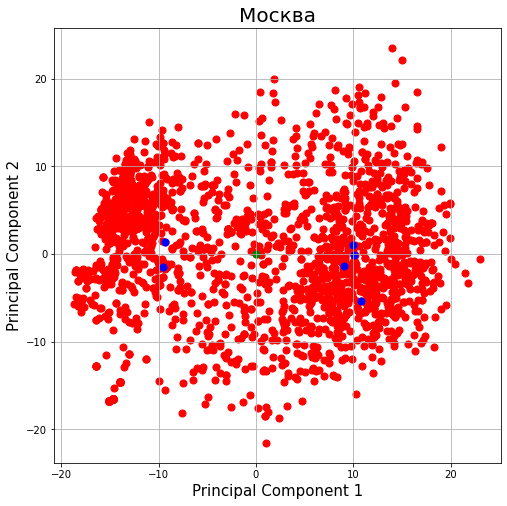

In [128]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Москва', fontsize = 20)

width = 0.005

colors = ['r', 'g', 'b']

ax.scatter(principalDf2['principal component 1']
            , principalDf2['principal component 2']
            , c = colors[0]
            , s = 50)

ax.scatter(principalDf2.loc[0,'principal component 1']
            , principalDf2.loc[0,'principal component 2']
            , c = colors[1]
            , s = 50)

for i in range(6):

    ax.scatter(principalDf2.loc[i + 1,'principal component 1']
                , principalDf2.loc[i + 1,'principal component 2']
                , c = colors[2]
                , s = 50)






# ax.legend(targets)
ax.grid()

In [82]:
principalDf3 = principalDf2[principalDf2["principal component 1"] <= -7]

In [ ]:
vopr = tens2[principalDf3.index].mean(dim = 0)

In [ ]:
get_word_m(vopr, dcts[folder], 20)

{'intrada': 0.7706124186515808,
 'mosca': 0.7662189602851868,
 'moscow': 0.8204152584075928,
 'moskau': 0.7760701179504395,
 'moskva': 0.7879104018211365,
 'кострома': 0.7848011255264282,
 'магнитогорск': 0.7772375345230103,
 'минск': 0.7800049185752869,
 'москва': 0.9331725239753723,
 'москве': 0.8700154423713684,
 'москвитянин': 0.8640138506889343,
 'москвой': 0.8438282608985901,
 'москву': 0.8591928482055664,
 'москвы': 0.8541550040245056,
 'московская': 0.7814010977745056,
 'московские': 0.7952905893325806,
 'московский': 0.7977662086486816,
 'московского': 0.7708969712257385,
 'московское': 0.7864766716957092,
 'пермь': 0.7693132162094116}

In [ ]:
def get_word(emb, dct, nin = []):
    word = "none"
    cs = -100 
    for key in dct:
        temp_cs = 1 - cosine(emb, dct[key])
        if temp_cs > cs and key not in nin:
            cs = temp_cs
            word = key
    return word, cs

def get_word_m(emb, dct, count = 3):
    res = {}
    for key in dct:
        res[key] = 1 - cosine(emb, dct[key])
    l = list(res.items()) 
    l.sort(key= lambda x:x[1], reverse = True)
    return dict(l[:count])

def add_names(df):
    names = {': capital-common-countries' : "Capitals-common-countries",
 ': capital-world': "Capital-countries",
 ': currency': "Currency",
#  ': city-in-state',
 ': family': "Family",
 ': gram1-adjective-to-adverb': "Adjective adverb",
 ': gram2-opposite': "Opposite",
 ': gram3-comparative': "Comparative",
#  ': gram4-superlative',
#  ': gram5-present-participle',
 ': gram6-nationality-adjective': "Nationality adjective",
#  ': gram7-past-tense',
#  ': gram8-plural',
#  ': gram9-plural-verbs'
    }
    df["type"] = "none"
    for i in names:
        if i in df.index:
            df.loc[i, "type"] = names[i]

    return df

def add_names_rus(ind):
    delim = "-"
    # delim = "→"
    names = {"Capitals-common-countries" : "Известные столицы {} страны".format(delim),
 "Capital-countries": "Столицы {} страны".format(delim),
 "Currency": "Валюта".format(delim),
#  ': city-in-state',
 "Family": "Мужской пол {} женский пол".format(delim),
 "Adjective adverb": "Прилагательное {} наречие".format(delim),
 "Opposite": "Антонимы",
 "Comparative": "Прилагательное {} сравнительная степенье".format(delim),
#  ': gram4-superlative',
#  ': gram5-present-participle',
 "Nationality adjective": "Национальность {} прилагательное".format(delim),
#  ': gram7-past-tense',
#  ': gram8-plural',
#  ': gram9-plural-verbs'
    }
    # df["type"] = "none"
    # for i in names:
    #     if i in df.index:
    #         df.loc[i, "type"] = names[i]
    ind2 = []
    for i in ind:
        ind2.append(names[i])
    return ind2

#PART3

###mix table

In [95]:

def get_r1(r1, metric):
    r1["metric"] = metric
    return r1.pivot(columns = ["metric"])

In [96]:
def mix_tables(CosAdd, CosAdd_3, CosAvg, CosMul):
    ddd1 = pd.DataFrame()
    ddd1 = get_r1(CosAdd[["cosine", "result", "count"]], "3CosAdd")
    ddd1 = ddd1.merge(get_r1(CosAdd_3[["cosine", "result", "count"]], "3CosAdd_3"), on = "type", how = "outer")
    ddd1 = ddd1.merge(get_r1(CosMul[["cosine", "result", "count"]], "3CosMul"), on = "type", how = "outer")
    ddd1 = ddd1.merge(get_r1(CosAvg[["cosine", "result", "count"]], "3CosAvg"), on = "type", how = "outer")


    # r1 = CosAvg[["cosine", "result", "count"]].copy()
    # r1["cosine"] = r1["prob"]
    # ddd1 = ddd1.merge(get_r1(r1[["cosine", "result", "count"]], "3CosAvg"), on = "type")#, how = "outer")

    ddd1["count1"] = ddd1["count", "3CosAdd"]

    ddd2 = ddd1[["result", "cosine", "count1"]]
    ddd2["count"]= ddd2["count1"]

    # ddd2 = add_names_rus(ddd2)
    # ddd2.index = ddd2["type"]
    ddd2.sort_index(inplace = True)


    return ddd2[["result", "cosine", "count"]]

In [106]:
files = [
         "3cosadd_3_itog.csv",
         "3cosadd_itog.csv", 
        #  "3cosavg_res.csv",
         "3cosavg_res_2.csv",
         "3cosmul_itog.csv"
]
results = {}
for i in folders:
    CosAdd = pd.read_csv("./embeddings/{}/tests/{}".format(i, "3cosadd_itog.csv"), index_col = "type")
    CosAdd_3 = pd.read_csv("./embeddings/{}/tests/{}".format(i, "3cosadd_3_itog.csv"), index_col = "type")
    CosAvg = pd.read_csv("./embeddings/{}/tests/{}".format(i, "3cosavg_res_2.csv"), index_col = "type")
    CosMul = pd.read_csv("./embeddings/{}/tests/{}".format(i, "3cosmul_itog.csv"), index_col = "type")

    results[i] = mix_tables(CosAdd, CosAdd_3, CosAvg, CosMul)
    
    results[i] = results[i].rename(columns = {('result') : ('accuracy')})
    results[i] = add_names_rus(results[i] )
    results[i] = results[i].rename(columns = { ('type1') : ('type')})[["accuracy", "cosine", "count"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [120]:
itog = pd.DataFrame(columns = results["bert-base-multilingual-cased-liter3"].columns)
for i in results:
    itog.loc[i] = results[i].mean()
itog

accuracy            ...    cosine       count
metric                                3CosAdd 3CosAdd_3  ...   3CosAvg            
bert-base-multilingual-cased-liter   0.500000  0.666667  ...  0.959926    4.000000
bert-base-multilingual-cased-liter2  0.238130  0.280361  ...  0.930051  315.833333
bert-base-multilingual-cased-liter3  0.178662  0.231677  ...  0.910464  315.833333
bert-base-multilingual-cased-polit   0.250000  0.416667  ...  0.948935    4.000000
bert-base-multilingual-cased-polit2  0.252470  0.313581  ...  0.931772  440.333333
bert-base-multilingual-cased-polit3  0.201275  0.256103  ...  0.904755  368.500000
DeepPavlov-liter                     0.347972  0.483857  ...  0.907153  169.833333
DeepPavlov-liter_2                   0.229650  0.307988  ...  0.919062  368.500000
DeepPavlov-liter_3                   0.205236  0.270549  ...  0.919239  356.333333
DeepPavlov-polit                     0.196811  0.333960  ...  0.926076  123.833333
DeepPavlov-polit_2                   0.223193  0.300616  ...  0.922675  483.333333
DeepPavlov-polit_3                   0.209909  0.280116  ...  0.919465  494.000000
elmo-DeepPavlov-liter                0.503571  0.586012  ...  0.821433   24.750000
elmo-DeepPavlov-polit                0.071429  0.309524  ...  0.778220   15.333333

[14 rows x 9 columns]

In [122]:
itog[["accuracy", "count"]]

accuracy            ...                 count
metric                                3CosAdd 3CosAdd_3  ...   3CosAvg            
bert-base-multilingual-cased-liter   0.500000  0.666667  ...  0.833333    4.000000
bert-base-multilingual-cased-liter2  0.238130  0.280361  ...  0.299470  315.833333
bert-base-multilingual-cased-liter3  0.178662  0.231677  ...  0.317549  315.833333
bert-base-multilingual-cased-polit   0.250000  0.416667  ...  0.833333    4.000000
bert-base-multilingual-cased-polit2  0.252470  0.313581  ...  0.366323  440.333333
bert-base-multilingual-cased-polit3  0.201275  0.256103  ...  0.407486  368.500000
DeepPavlov-liter                     0.347972  0.483857  ...  0.507098  169.833333
DeepPavlov-liter_2                   0.229650  0.307988  ...  0.368856  368.500000
DeepPavlov-liter_3                   0.205236  0.270549  ...  0.370843  356.333333
DeepPavlov-polit                     0.196811  0.333960  ...  0.534635  123.833333
DeepPavlov-polit_2                   0.223193  0.300616  ...  0.391554  483.333333
DeepPavlov-polit_3                   0.209909  0.280116  ...  0.354172  494.000000
elmo-DeepPavlov-liter                0.503571  0.586012  ...  0.902976   24.750000
elmo-DeepPavlov-polit                0.071429  0.309524  ...  0.769841   15.333333

[14 rows x 5 columns]

In [109]:
def my_dump(file, name):
    with open("./" + name + ".pic", 'wb') as f:
        pc.dump(file, f)

def my_load(name):
    with open("./" + name + ".pic", 'rb') as f:
        return pc.load(f)

In [111]:
my_dump(results, "results_")

In [ ]:
# del results

In [ ]:
# ddd1 = mix_tables(CosAdd, CosAdd_3, CosAvg, CosMul)
# ddd1[["result", "cosine", "count"]]